# Is Proactive Policing Effective?
Loren Atherley & Carl Sharpe

In [1]:
from IPython.display import HTML, display
display(HTML("<style>.container { width:100% !important; }</style>")) 

## Probabalistic Time Series Analysis

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from matplotlib.pylab import rcParams

df = pd.read_excel('timeseries.xlsx')
df.index = pd.to_datetime(df['Date'])
df[['Call Rate','Crime Rate']].plot()
plt.xlabel('Date')
plt.title('Crime / Call Rate Plot')
plt.ylabel('Rate')
df[['Person Rate','Property Rate','Society Rate']].plot()
plt.xlabel('Date')
plt.title('Crime Rates Plot - by Crime Group')
plt.ylabel('Rate')
df[['Onview Rate','Dispatch Rate']].plot()
plt.xlabel('Date')
plt.title('Call Rates - by Call Type')
plt.ylabel('Rate')

Text(0,0.5,'Rate')

### Auto Correlation and Partial Autocorrelation Plots 

Crime Rate


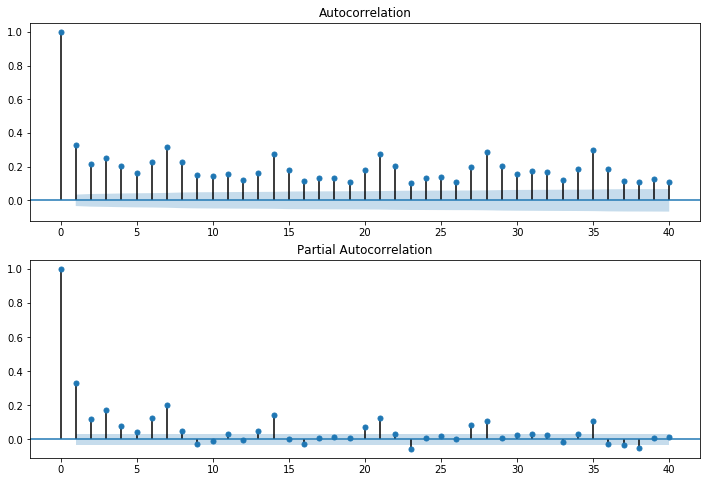

Call Rate


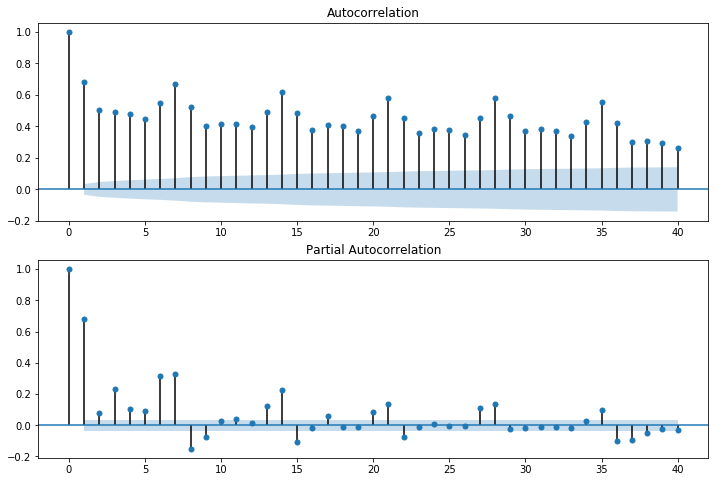

Person Rate


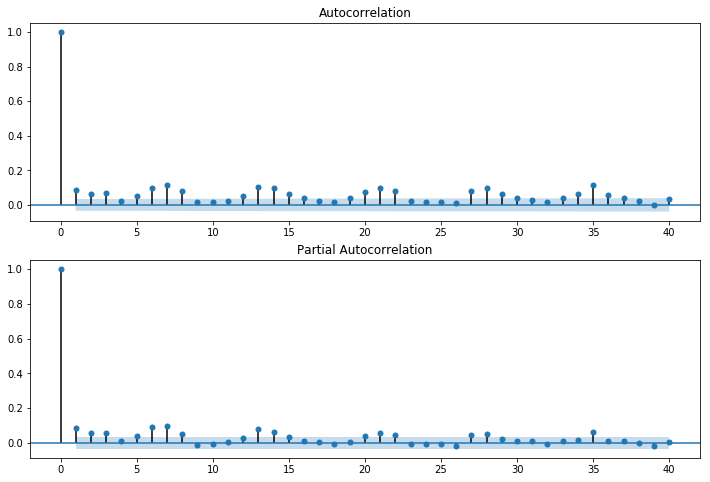

Property Rate


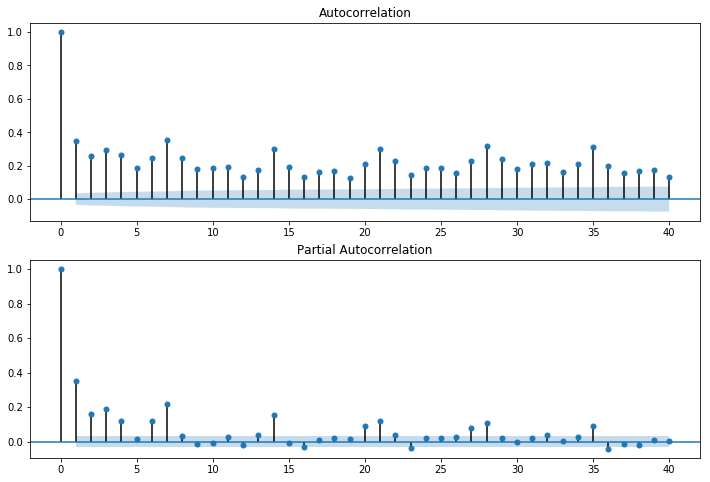

Society Rate


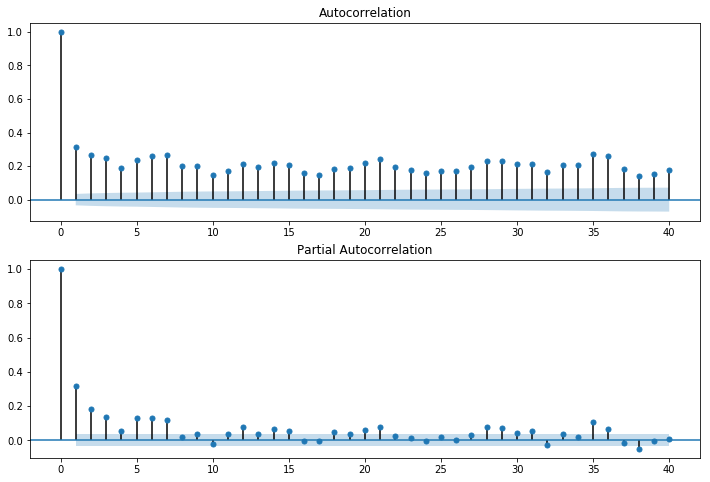

Onview Rate


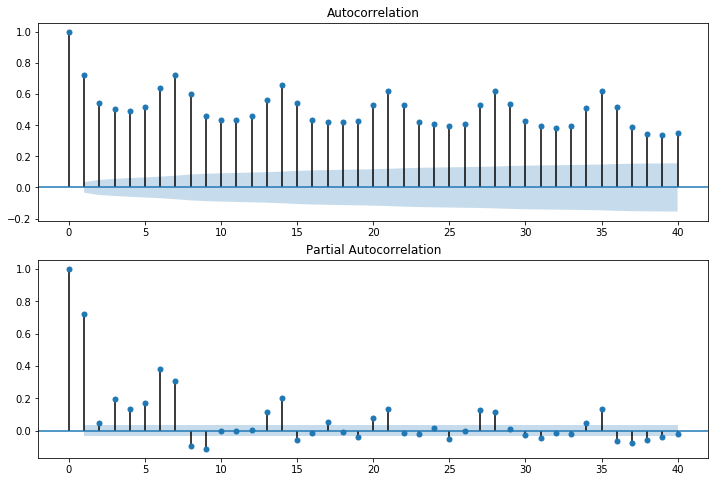

Dispatch Rate


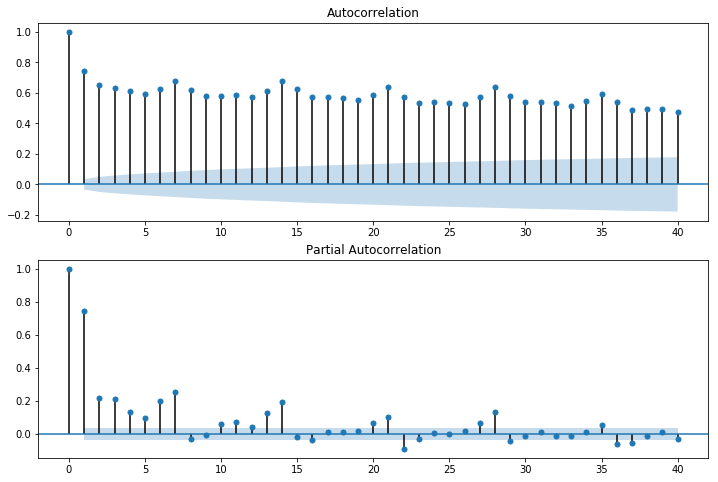

In [17]:
def auto_partial_autocorrelation(timeseries):

    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(timeseries, lags = 40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(timeseries, lags = 40, ax=ax2)
    ax1.set_title('Autocorrelation') #need to figure out how to put parameter here (ex:'Crime Rate - Autocorrelation')
    ax2.set_title('Partial Autocorrelation') #same here
    plt.show()

print('Crime Rate')
auto_partial_autocorrelation(df['Crime Rate'])    
print('Call Rate')
auto_partial_autocorrelation(df['Call Rate'])
print('Person Rate')
auto_partial_autocorrelation(df['Person Rate'])
print('Property Rate')
auto_partial_autocorrelation(df['Property Rate'])
print('Society Rate')
auto_partial_autocorrelation(df['Society Rate'])
print('Onview Rate')
auto_partial_autocorrelation(df['Onview Rate'])
print('Dispatch Rate')
auto_partial_autocorrelation(df['Dispatch Rate'])

### Test for Stationarity

Crime Rate


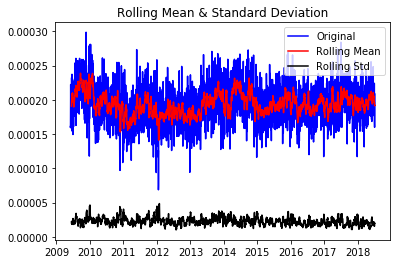

Results of Dickey-Fuller Test:
Test Statistic                   -4.925528
p-value                           0.000031
#Lags Used                       27.000000
Number of Observations Used    3293.000000
Critical Value (1%)              -3.432337
Critical Value (5%)              -2.862418
Critical Value (10%)             -2.567237
dtype: float64
 
Call Rate


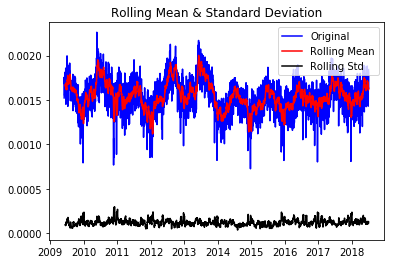

Results of Dickey-Fuller Test:
Test Statistic                   -3.340854
p-value                           0.013148
#Lags Used                       27.000000
Number of Observations Used    3293.000000
Critical Value (1%)              -3.432337
Critical Value (5%)              -2.862418
Critical Value (10%)             -2.567237
dtype: float64
 
Person Rate


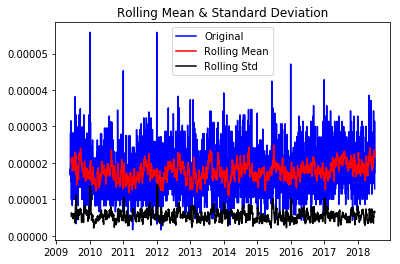

Results of Dickey-Fuller Test:
Test Statistic                -6.924194e+00
p-value                        1.126275e-09
#Lags Used                     2.700000e+01
Number of Observations Used    3.293000e+03
Critical Value (1%)           -3.432337e+00
Critical Value (5%)           -2.862418e+00
Critical Value (10%)          -2.567237e+00
dtype: float64
 
Property Rate


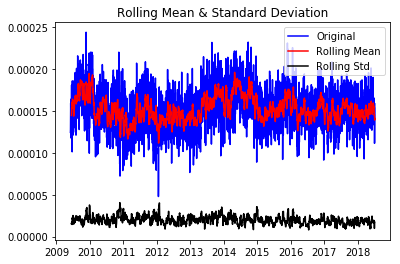

Results of Dickey-Fuller Test:
Test Statistic                   -4.467694
p-value                           0.000225
#Lags Used                       27.000000
Number of Observations Used    3293.000000
Critical Value (1%)              -3.432337
Critical Value (5%)              -2.862418
Critical Value (10%)             -2.567237
dtype: float64
 
Society Rate


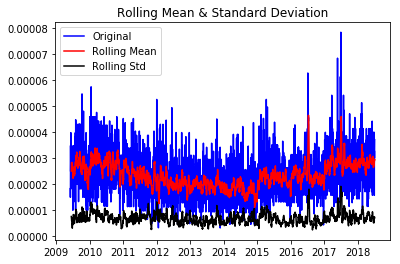

Results of Dickey-Fuller Test:
Test Statistic                   -4.132956
p-value                           0.000854
#Lags Used                       29.000000
Number of Observations Used    3291.000000
Critical Value (1%)              -3.432339
Critical Value (5%)              -2.862419
Critical Value (10%)             -2.567238
dtype: float64
 
Onview Rate


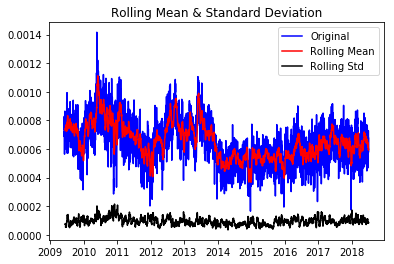

Results of Dickey-Fuller Test:
Test Statistic                   -3.193775
p-value                           0.020348
#Lags Used                       27.000000
Number of Observations Used    3293.000000
Critical Value (1%)              -3.432337
Critical Value (5%)              -2.862418
Critical Value (10%)             -2.567237
dtype: float64
 
Dispatch Rate


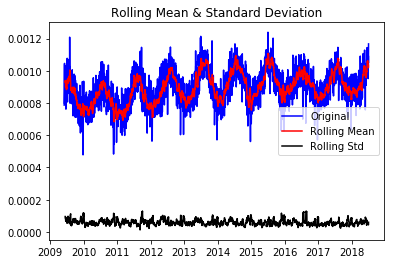

Results of Dickey-Fuller Test:
Test Statistic                   -2.515565
p-value                           0.111733
#Lags Used                       28.000000
Number of Observations Used    3292.000000
Critical Value (1%)              -3.432338
Critical Value (5%)              -2.862418
Critical Value (10%)             -2.567238
dtype: float64


In [15]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

print('Crime Rate')
test_stationarity(df['Crime Rate'])
print(' ')
print('Call Rate')
test_stationarity(df['Call Rate'])
print(' ')
print('Person Rate')
test_stationarity(df['Person Rate'])
print(' ')
print('Property Rate')
test_stationarity(df['Property Rate'])
print(' ')
print('Society Rate')
test_stationarity(df['Society Rate'])
print(' ')
print('Onview Rate')
test_stationarity(df['Onview Rate'])
print(' ')
print('Dispatch Rate')
test_stationarity(df['Dispatch Rate'])

Cannot reject the null hypothesis for the Dispatch Rate - Difference the Dispatch Rate

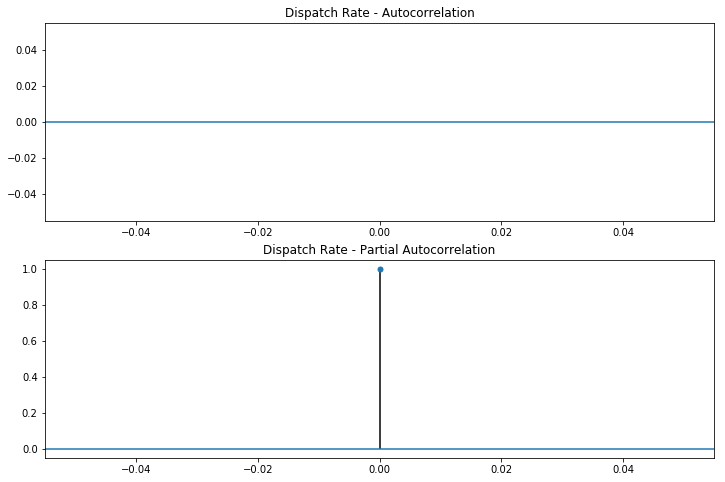

In [6]:
# Doesnt look right
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Dispatch Rate'].diff(), lags = 40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Dispatch Rate'].diff(), lags = 40, ax=ax2)
ax1.set_title('Dispatch Rate - Autocorrelation')
ax2.set_title('Dispatch Rate - Partial Autocorrelation')
plt.show()

Run ARIMA

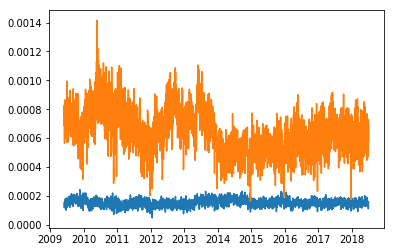

In [7]:
plt.plot(df[['Property Rate','Onview Rate']])